In [2]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images

In [3]:
count = 0
videoFile = r"C:\Users\Nadhiya\Downloads\Tom and jerry.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


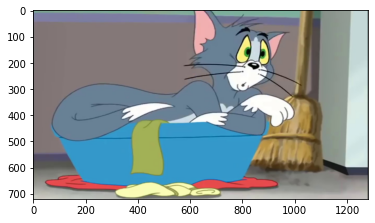

In [4]:
img = plt.imread('frame2.jpg')   # reading image using its name
plt.imshow(img)

In [5]:
data = pd.read_csv(r"C:\Users\Nadhiya\Downloads\mapping.csv")     # reading the csv file
data.head()

,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame2.jpg,2
3,frame3.jpg,2
4,frame4.jpg,2


In [6]:
X = [ ]     # creating an empty array
for img_name in data.Image_ID:
    img = plt.imread(r'C:\Users\Nadhiya\Desktop\frames\d\frame0.jpg')
    X.append(img)  # storing each image in array X
X = np.array(X)    # converting list to array

In [7]:
y = data.Class
dummy_y = np_utils.to_categorical(y)  

In [8]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)

In [9]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)    # preparing the validation set

In [11]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [12]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))    # include_top=False to remove the top layer

In [13]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

((208, 7, 7, 512), (90, 7, 7, 512))

In [14]:
X_train = X_train.reshape(208, 7*7*512)      # converting to 1-D
X_valid = X_valid.reshape(90, 7*7*512)

In [15]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()

In [16]:
#  i. Building the model
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(3, activation='softmax'))    # output layer

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3075      
Total params: 25,694,211
Trainable params: 25,694,211
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
# iii. Training the model
model.fit(train, y_train, epochs=200, validation_data=(X_valid, y_valid))

Epoch 1/200
7/7 [==============================] - 2s 275ms/step - loss: 1.0746 - accuracy: 0.4087 - val_loss: 1.0867 - val_accuracy: 0.3889
Epoch 2/200
7/7 [==============================] - 1s 214ms/step - loss: 1.0702 - accuracy: 0.3654 - val_loss: 1.0814 - val_accuracy: 0.3889
Epoch 3/200
7/7 [==============================] - 1s 211ms/step - loss: 1.0704 - accuracy: 0.4087 - val_loss: 1.0856 - val_accuracy: 0.3889
Epoch 4/200
7/7 [==============================] - 1s 208ms/step - loss: 1.0710 - accuracy: 0.3702 - val_loss: 1.0827 - val_accuracy: 0.3667
Epoch 5/200
7/7 [==============================] - 1s 212ms/step - loss: 1.0705 - accuracy: 0.4038 - val_loss: 1.0941 - val_accuracy: 0.3889
Epoch 6/200
7/7 [==============================] - 1s 209ms/step - loss: 1.0935 - accuracy: 0.4087 - val_loss: 1.0808 - val_accuracy: 0.3667
Epoch 7/200
7/7 [==============================] - 1s 211ms/step - loss: 1.0824 - accuracy: 0.3750 - val_loss: 1.0901 - val_accuracy: 0.3889
Epoch 8/200
7

Epoch 59/200
7/7 [==============================] - 1s 214ms/step - loss: 1.0693 - accuracy: 0.4087 - val_loss: 1.0845 - val_accuracy: 0.3889
Epoch 60/200
7/7 [==============================] - 1s 204ms/step - loss: 1.0727 - accuracy: 0.4087 - val_loss: 1.0801 - val_accuracy: 0.3889
Epoch 61/200
7/7 [==============================] - 2s 222ms/step - loss: 1.0695 - accuracy: 0.3942 - val_loss: 1.0892 - val_accuracy: 0.3667
Epoch 62/200
7/7 [==============================] - 2s 221ms/step - loss: 1.0725 - accuracy: 0.4038 - val_loss: 1.0828 - val_accuracy: 0.3889
Epoch 63/200
7/7 [==============================] - 2s 231ms/step - loss: 1.0736 - accuracy: 0.3702 - val_loss: 1.0840 - val_accuracy: 0.3667
Epoch 64/200
7/7 [==============================] - 2s 234ms/step - loss: 1.0717 - accuracy: 0.4038 - val_loss: 1.0893 - val_accuracy: 0.3889
Epoch 65/200
7/7 [==============================] - 2s 222ms/step - loss: 1.0770 - accuracy: 0.4087 - val_loss: 1.0803 - val_accuracy: 0.3889
Epoch 

7/7 [==============================] - 1s 207ms/step - loss: 1.0683 - accuracy: 0.4087 - val_loss: 1.0813 - val_accuracy: 0.3889
Epoch 117/200
7/7 [==============================] - 1s 209ms/step - loss: 1.0911 - accuracy: 0.3654 - val_loss: 1.0829 - val_accuracy: 0.3667
Epoch 118/200
7/7 [==============================] - 1s 209ms/step - loss: 1.0715 - accuracy: 0.3846 - val_loss: 1.0984 - val_accuracy: 0.3889
Epoch 119/200
7/7 [==============================] - 1s 207ms/step - loss: 1.0743 - accuracy: 0.4087 - val_loss: 1.0856 - val_accuracy: 0.3889
Epoch 120/200
7/7 [==============================] - 1s 208ms/step - loss: 1.0841 - accuracy: 0.3894 - val_loss: 1.0842 - val_accuracy: 0.3667
Epoch 121/200
7/7 [==============================] - 1s 205ms/step - loss: 1.0631 - accuracy: 0.3558 - val_loss: 1.0964 - val_accuracy: 0.3889
Epoch 122/200
7/7 [==============================] - 1s 210ms/step - loss: 1.0803 - accuracy: 0.4087 - val_loss: 1.0995 - val_accuracy: 0.3889
Epoch 123/200

7/7 [==============================] - 1s 209ms/step - loss: 1.0689 - accuracy: 0.3702 - val_loss: 1.0813 - val_accuracy: 0.3889
Epoch 174/200
7/7 [==============================] - 1s 207ms/step - loss: 1.0691 - accuracy: 0.4087 - val_loss: 1.0838 - val_accuracy: 0.3889
Epoch 175/200
7/7 [==============================] - 1s 206ms/step - loss: 1.0675 - accuracy: 0.3750 - val_loss: 1.0849 - val_accuracy: 0.3667
Epoch 176/200
7/7 [==============================] - 1s 209ms/step - loss: 1.0726 - accuracy: 0.3269 - val_loss: 1.0853 - val_accuracy: 0.3889
Epoch 177/200
7/7 [==============================] - 1s 206ms/step - loss: 1.0697 - accuracy: 0.3894 - val_loss: 1.0837 - val_accuracy: 0.3667
Epoch 178/200
7/7 [==============================] - 1s 209ms/step - loss: 1.0663 - accuracy: 0.3750 - val_loss: 1.0798 - val_accuracy: 0.3889
Epoch 179/200
7/7 [==============================] - 1s 207ms/step - loss: 1.0684 - accuracy: 0.4087 - val_loss: 1.0833 - val_accuracy: 0.3889
Epoch 180/200

In [30]:
count = 0
videoFile = "Tom and Jerry 3.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [31]:
test = pd.read_csv(r'C:\Users\Nadhiya\Downloads\test(1).csv')

In [32]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread(r'C:\Users\Nadhiya\Desktop\frames\d\frame0.jpg')
    test_image.append(img)
test_img = np.array(test_image)

In [33]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)


In [34]:
# preprocessing the images
test_image = preprocess_input(test_image)

# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)

# converting the images to 1-D form
test_image = test_image.reshape(186, 7*7*512)

# zero centered images
test_image = test_image/test_image.max()

In [35]:
predictions = model.predict_classes(test_image)

In [36]:
predictions 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [37]:
print("The screen time of JERRY is", predictions[predictions==1].shape[0], "seconds")
print("The screen time of TOM is", predictions[predictions==2].shape[0], "seconds")

The screen time of JERRY is 0 seconds
The screen time of TOM is 186 seconds
